<a href="https://colab.research.google.com/github/martadftese/hello-world/blob/master/T3_An%C3%A1lise_de_Emo%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Sentimentos em base de dados com rótulos de 5 emoções

## Setup do ambiente: importação de todas as bibliotecas necessárias para rodar o algoritmo

---



In [0]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
import sklearn.model_selection as sk
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam


# Base de Dados
## O corpus utilizado contém imagens da face de uma atriz expressando quatro estados emocionais diferentes, além do estado neutro: “joy”, “anger”, “fear”, “sadness”. O objetivo desse exercício é identificar a capacidade do algoritmo para reconhecer essas 5 emoções nessa base rotulada, portanto um problema de Machine Learning de classificação supervisionado.
## Upload do arquivo considerando a vírgula como separador

In [5]:

imagem_face = pd.read_csv('imagedb_CH_disciplina.csv',sep=',', encoding='UTF-8', header=None)
imagem_face.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,Em9_Fala3_0204_640x480.png,admiration,i,k,\at,k,o,\at,NaN,(303.5;319.0),(378.5;326.0),(343.5;319.5),(342.0;347.5),(334.0;315.5),(354.0;314.5),(318.5;316.5),(367.5;318.5),(317.5;338.5),(363.5;341.5),(326.5;196.5),(306.5;193.5),(279.5;203.0),(381.5;200.0),(400.0;198.5),(425.5;215.0),(327.5;237.5),(287.5;233.5),(305.5;225.5),(307.0;240.0),(373.0;240.0),(414.0;241.0),(395.5;232.0),(395.5;244.0),(343.0;238.0),(359.5;239.5),(351.0;238.5),(348.5;289.0),(324.5;285.0),(365.5;288.5),(338.0;263.0),(362.5;265.0),(350.0;264.0),(346.5;299.5),(356.0;152.0),(306.0;146.5),(406.5;155.5),(340.5;394.0),(268.0;331.5),(411.5;343.0),(294.0;371.0),(383.0;377.0),(232.0;209.0),(224.5;238.5),(248.5;287.5),(258.0;280.0),(462.0;224.5),(467.0;250.5),(436.0;300.0),(428.5;289.5),(326.5;325.0),(326.5;334.5),(345.5;327.0),(344.0;338.0),(363.5;325.5),(363.5;333.0)
1,Em9_Fala1_0220_640x480.png,admiration,\ep,u\~^,\ct,t,\ic,\ct,NaN,(317.5;328.5),(367.5;328.0),(345.0;313.0),(343.5;352.0),(335.5;312.0),(353.5;312.0),(325.5;317.5),(362.0;317.5),(326.0;345.5),(361.0;344.5),(322.0;198.5),(298.5;196.5),(272.0;205.0),(370.0;200.5),(394.0;197.5),(420.5;207.0),(322.5;231.5),(281.0;229.5),(300.5;220.0),(300.5;238.5),(370.0;230.0),(410.0;229.0),(391.0;220.5),(390.5;238.0),(337.5;231.0),(355.5;230.0),(346.5;230.5),(346.0;277.5),(321.0;277.5),(365.5;277.0),(333.0;253.0),(358.5;253.5),(345.5;253.0),(345.0;289.5),(346.5;137.0),(293.0;139.5),(395.5;140.5),(343.5;393.5),(278.0;348.0),(410.5;342.0),(298.5;376.5),(385.0;376.0),(230.0;215.0),(222.5;246.0),(245.0;289.5),(258.0;283.0),(457.5;218.5),(464.0;246.0),(439.0;295.0),(428.5;288.0),(332.5;324.0),(332.5;336.0),(344.5;321.5),(344.0;339.5),(354.0;323.5),(355.0;336.5)
2,Em9_Fala3_0147_640x480.png,admiration,i,k,\ep,\gf,NaN,\ep,NaN,(293.5;309.5),(376.0;314.5),(334.5;307.0),(325.5;338.5),(324.0;304.0),(345.5;305.5),(306.5;305.0),(361.0;307.5),(298.5;329.0),(353.0;333.0),(319.5;200.5),(293.5;189.5),(270.5;198.0),(369.0;201.5),(398.0;197.0),(417.5;208.0),(318.0;231.0),(274.5;225.5),(297.0;216.5),(296.5;235.5),(363.0;231.5),(405.5;232.5),(388.5;221.5),(386.0;241.0),(332.0;229.5),(352.0;230.5),(342.0;230.0),(339.5;277.5),(315.0;277.0),(363.0;279.0),(329.5;251.5),(352.0;253.0),(340.5;252.0),(339.5;289.5),(346.0;138.0),(290.5;139.5),(404.5;148.5),(332.0;385.5),(259.0;319.5),(410.5;328.0),(284.5;363.0),(377.5;368.5),(224.5;207.0),(219.0;236.5),(239.0;284.0),(251.0;276.5),(454.5;221.0),(461.5;248.0),(433.5;296.5),(424.0;287.0),(314.0;312.5),(311.0;330.0),(333.0;314.5),(328.5;330.0),(351.5;315.0),(351.5;325.5)
3,Em9_Fala1_0142_640x480.png,admiration,m,i,\fh,a,d,\fh1,NaN,(298.0;297.5),(378.0;302.0),(339.5;289.5),(337.5;327.5),(329.5;286.0),(349.0;285.5),(313.5;289.5),(364.0;291.0),(308.0;321.0),(364.5;323.5),(318.5;186.5),(297.5;178.5),(272.5;190.0),(371.5;188.0),(397.0;187.0),(420.5;200.5),(323.0;219.0),(278.0;217.0),(300.0;213.0),(300.5;220.0),(367.0;220.5),(406.5;222.5),(391.0;216.0),(390.0;224.5),(335.0;218.0),(357.0;218.0),(346.0;218.0),(341.5;263.0),(317.5;260.5),(365.5;260.5),(330.0;238.0),(353.0;238.0),(341.5;238.0),(340.0;274.5),(348.5;124.0),(298.0;133.0),(396.5;134.5),(339.0;373.0),(264.5;312.0),(417.5;320.0),(287.5;350.0),(392.5;350.5),(233.5;207.0),(226.5;237.5),(245.5;280.0),(258.0;272.0),(459.0;216.5),(467.0;244.5),(438.5;291.0),(428.5;280.5),(317.5;296.0),(316.5;315.5),(339.0;297.0),(339.0;319.5),(355.5;296.5),(357.0;319.5)
4,Em9_Fala2_0079_640x480.png,admiration,\zh,u,\fh,\hs,k,\fh2,NaN,(317.0;315.5),(375.0;317.0),(349.5;304.5),(347.0;334.0),(340.5;302.5),(357.5;302.0),(330.5;307.0),(368.5;307.5),(329.5;329.5),(362.5;329.5),(327.5;180.0),(306.0;179.5),(282.0;191.0),(380.5;182.5),(403.5;184.5),(426.5;199.0),(329.0;224.5),(290.0;224.5),(307.5;222.0),(307.5;231.0),(374.5;225.5),(413.0;230.5),(397.5;225.5),(394.0;233.0),(342.5;223.0),(363.0;223.

# CLEANING NA BASE DE DADOS
## Gerar arquivo apenas com as entradas que representam as emoções FEAR ou ANGER ou JOY ou SADNESS. Originalmente, a base de dados contém, além das emoções citadas, outros rótulos, tais como Admiração e Desapontamento.

In [0]:

base_treino = imagem_face.loc[(imagem_face[:][1]== 'fear') | (imagem_face[:][1]=='anger') | (imagem_face[:][1]=='joy') | (imagem_face[:][1]=='sadness') | (imagem_face[:][1]=='neutral')]
contador_base_treino = len(base_treino)

In [0]:
contador_base_treino

195

In [0]:
base_treino.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
39,Em22_Fala1_0049_640x480.png,anger,u,\sh,\at,#,v,\at,NaN,(302.0;328.0),(370.5;331.5),(340.0;315.5),(337.5;368.0),(330.0;312.0),(350.0;312.5),(314.5;317.5),(362.5;319.0),(308.0;357.0),(362.0;359.0),(323.0;211.5),(297.0;205.0),(272.5;209.5),(371.0;213.0),(393.5;208.5),(420.0;218.5),(320.5;238.0),(280.0;232.5),(300.0;224.0),(299.5;242.0),(367.5;239.5),(408.0;239.0),(389.5;228.5),(388.5;246.5),(333.5;240.0),(353.5;239.5),(343.5;239.5),(343.0;285.5),(316.5;285.0),(364.5;287.0),(330.0;261.5),(356.0;261.0),(343.0;261.0),(341.0;298.0),(349.5;146.0),(297.0;145.0),(400.0;151.0),(337.5;408.5),(263.5;337.5),(409.0;339.5),(288.0;382.5),(382.0;385.0),(228.0;214.0),(219.0;242.5),(243.5;290.0),(254.0;286.5),(453.5;227.0),(459.0;254.5),(428.5;302.5),(422.0;296.0),(318.0;323.5),(316.5;356.0),(338.5;322.5),(337.5;358.0),(359.5;323.0),(357.5;351.0)
40,Em22_Fala3_0041_640x480.png,anger,p,i,\ct,\gf,#,\ct,NaN,(333.5;340.5),(386.5;337.0),(365.0;312.0),(361.0;372.5),(354.5;312.0),(377.0;310.5),(341.0;323.5),(385.0;322.5),(339.5;360.5),(380.0;358.5),(334.0;215.5),(311.0;210.5),(281.0;219.5),(380.0;216.0),(404.5;206.5),(429.5;213.5),(335.5;243.5),(292.0;243.0),(310.5;234.0),(311.5;250.0),(379.5;240.0),(419.0;236.5),(399.0;228.5),(399.0;245.0),(348.5;242.0),(369.0;240.0),(358.5;241.0),(365.0;290.0),(337.5;289.5),(383.5;286.0),(352.0;265.5),(372.0;262.5),(362.0;264.0),(363.5;301.5),(357.0;147.0),(306.0;152.5),(402.5;154.0),(361.0;403.5),(285.5;352.5),(421.0;330.5),(311.5;386.0),(404.5;372.5),(224.0;224.5),(217.5;252.5),(248.0;299.5),(259.5;292.5),(451.5;215.5),(457.5;238.0),(436.5;292.5),(429.0;290.0),(345.5;328.5),(345.0;350.0),(362.5;322.0),(361.5;356.5),(375.0;323.0),(376.0;343.0)
41,Em22_Fala1_0165_640x480.png,anger,i\~^,f,\ep,\fh,n,\ep,NaN,(297.5;308.0),(373.0;311.5),(339.0;295.0),(336.5;340.5),(327.5;292.0),(349.0;293.0),(310.5;297.0),(363.5;300.0),(309.5;333.5),(361.5;332.5),(316.0;195.5),(293.5;191.5),(269.0;201.0),(369.5;199.0),(396.0;196.0),(419.0;209.5),(319.5;226.5),(280.0;226.5),(299.5;224.0),(299.5;231.5),(364.0;228.5),(404.0;233.0),(388.5;229.0),(387.0;237.0),(332.0;227.0),(352.0;227.5),(342.0;227.0),(341.0;270.5),(315.0;265.5),(363.5;268.5),(330.0;249.0),(353.0;249.0),(341.5;249.0),(340.5;281.5),(349.0;135.5),(293.5;138.5),(400.5;145.5),(333.5;387.0),(260.0;321.5),(410.5;329.0),(279.5;358.0),(379.5;364.0),(227.0;211.0),(219.5;241.5),(242.5;286.0),(254.0;279.5),(453.0;224.5),(460.0;253.0),(429.0;299.0),(420.5;289.5),(319.0;300.0),(316.0;327.5),(337.0;300.5),(336.5;332.0),(357.0;303.0),(357.5;328.5)
42,Em22_Fala2_0166_640x480.png,anger,\sh,e,\fh,a,\yt,\fh1,NaN,(309.0;322.0),(383.5;325.0),(355.5;307.0),(352.0;355.0),(345.0;303.0),(365.5;304.0),(326.0;309.5),(378.0;313.0),(324.5;351.0),(374.0;350.5),(328.5;202.5),(305.0;197.5),(278.5;204.5),(381.0;205.0),(402.5;200.5),(427.0;211.5),(329.5;234.0),(289.5;230.5),(306.5;221.5),(305.5;237.5),(376.0;233.0),(416.0;234.0),(396.0;223.0),(394.0;238.5),(344.5;234.0),(365.0;233.5),(354.5;233.5),(357.5;279.0),(330.5;277.5),(375.5;278.0),(345.5;256.0),(368.0;256.0),(356.5;256.0),(356.5;291.5),(356.5;143.0),(303.0;142.0),(402.5;147.5),(353.0;396.5),(269.5;340.5),(412.0;334.0),(300.0;378.5),(392.0;372.0),(217.5;216.5),(211.5;248.5),(242.0;292.5),(251.5;286.5),(445.5;222.0),(451.5;250.0),(429.0;298.5),(422.5;295.0),(334.0;316.0),(331.0;344.5),(353.5;315.5),(351.5;346.0),(371.5;318.0),(370.5;339.5)
43,Em22_Fala3_0292_640x480.png,anger,k,a,\gf,\hs,NaN,\fh2,NaN,(317.0;331.5),(381.0;333.0),(352.5;319.0),(350.0;358.5),(341.5;316.0),(362.0;316.0),(329.0;321.5),(371.0;322.0),(329.0;349.5),(370.5;350.0),(329.0;210.5),(307.0;206.0),(282.0;210.5),(379.5;209.5),(404.0;207.5),(427.0;218.0),(330.0;239.0),(287.0;233.5),(309.0;226.0),(307.0;243.0),(375.5;238.0),(417.5;237.5),(398.5;227.5),(396.0;246.0),(345.5;240.0),(364.0;241.5),(354.5;240

## Ainda dentro da atividade de Cleaning da base, aqui é feita a geração de arquivo cujo conteúdo são os pares de coordenadas de pontos característicos da face das entradas com as emoções descritas acima.

In [0]:
entrada = base_treino.iloc[0:base_treino.shape[0],9:base_treino.shape[1]]
entrada.head()

,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
39,(302.0;328.0),(370.5;331.5),(340.0;315.5),(337.5;368.0),(330.0;312.0),(350.0;312.5),(314.5;317.5),(362.5;319.0),(308.0;357.0),(362.0;359.0),(323.0;211.5),(297.0;205.0),(272.5;209.5),(371.0;213.0),(393.5;208.5),(420.0;218.5),(320.5;238.0),(280.0;232.5),(300.0;224.0),(299.5;242.0),(367.5;239.5),(408.0;239.0),(389.5;228.5),(388.5;246.5),(333.5;240.0),(353.5;239.5),(343.5;239.5),(343.0;285.5),(316.5;285.0),(364.5;287.0),(330.0;261.5),(356.0;261.0),(343.0;261.0),(341.0;298.0),(349.5;146.0),(297.0;145.0),(400.0;151.0),(337.5;408.5),(263.5;337.5),(409.0;339.5),(288.0;382.5),(382.0;385.0),(228.0;214.0),(219.0;242.5),(243.5;290.0),(254.0;286.5),(453.5;227.0),(459.0;254.5),(428.5;302.5),(422.0;296.0),(318.0;323.5),(316.5;356.0),(338.5;322.5),(337.5;358.0),(359.5;323.0),(357.5;351.0)
40,(333.5;340.5),(386.5;337.0),(365.0;312.0),(361.0;372.5),(354.5;312.0),(377.0;310.5),(341.0;323.5),(385.0;322.5),(339.5;360.5),(380.0;358.5),(334.0;215.5),(311.0;210.5),(281.0;219.5),(380.0;216.0),(404.5;206.5),(429.5;213.5),(335.5;243.5),(292.0;243.0),(310.5;234.0),(311.5;250.0),(379.5;240.0),(419.0;236.5),(399.0;228.5),(399.0;245.0),(348.5;242.0),(369.0;240.0),(358.5;241.0),(365.0;290.0),(337.5;289.5),(383.5;286.0),(352.0;265.5),(372.0;262.5),(362.0;264.0),(363.5;301.5),(357.0;147.0),(306.0;152.5),(402.5;154.0),(361.0;403.5),(285.5;352.5),(421.0;330.5),(311.5;386.0),(404.5;372.5),(224.0;224.5),(217.5;252.5),(248.0;299.5),(259.5;292.5),(451.5;215.5),(457.5;238.0),(436.5;292.5),(429.0;290.0),(345.5;328.5),(345.0;350.0),(362.5;322.0),(361.5;356.5),(375.0;323.0),(376.0;343.0)
41,(297.5;308.0),(373.0;311.5),(339.0;295.0),(336.5;340.5),(327.5;292.0),(349.0;293.0),(310.5;297.0),(363.5;300.0),(309.5;333.5),(361.5;332.5),(316.0;195.5),(293.5;191.5),(269.0;201.0),(369.5;199.0),(396.0;196.0),(419.0;209.5),(319.5;226.5),(280.0;226.5),(299.5;224.0),(299.5;231.5),(364.0;228.5),(404.0;233.0),(388.5;229.0),(387.0;237.0),(332.0;227.0),(352.0;227.5),(342.0;227.0),(341.0;270.5),(315.0;265.5),(363.5;268.5),(330.0;249.0),(353.0;249.0),(341.5;249.0),(340.5;281.5),(349.0;135.5),(293.5;138.5),(400.5;145.5),(333.5;387.0),(260.0;321.5),(410.5;329.0),(279.5;358.0),(379.5;364.0),(227.0;211.0),(219.5;241.5),(242.5;286.0),(254.0;279.5),(453.0;224.5),(460.0;253.0),(429.0;299.0),(420.5;289.5),(319.0;300.0),(316.0;327.5),(337.0;300.5),(336.5;332.0),(357.0;303.0),(357.5;328.5)
42,(309.0;322.0),(383.5;325.0),(355.5;307.0),(352.0;355.0),(345.0;303.0),(365.5;304.0),(326.0;309.5),(378.0;313.0),(324.5;351.0),(374.0;350.5),(328.5;202.5),(305.0;197.5),(278.5;204.5),(381.0;205.0),(402.5;200.5),(427.0;211.5),(329.5;234.0),(289.5;230.5),(306.5;221.5),(305.5;237.5),(376.0;233.0),(416.0;234.0),(396.0;223.0),(394.0;238.5),(344.5;234.0),(365.0;233.5),(354.5;233.5),(357.5;279.0),(330.5;277.5),(375.5;278.0),(345.5;256.0),(368.0;256.0),(356.5;256.0),(356.5;291.5),(356.5;143.0),(303.0;142.0),(402.5;147.5),(353.0;396.5),(269.5;340.5),(412.0;334.0),(300.0;378.5),(392.0;372.0),(217.5;216.5),(211.5;248.5),(242.0;292.5),(251.5;286.5),(445.5;222.0),(451.5;250.0),(429.0;298.5),(422.5;295.0),(334.0;316.0),(331.0;344.5),(353.5;315.5),(351.5;346.0),(371.5;318.0),(370.5;339.5)
43,(317.0;331.5),(381.0;333.0),(352.5;319.0),(350.0;358.5),(341.5;316.0),(362.0;316.0),(329.0;321.5),(371.0;322.0),(329.0;349.5),(370.5;350.0),(329.0;210.5),(307.0;206.0),(282.0;210.5),(379.5;209.5),(404.0;207.5),(427.0;218.0),(330.0;239.0),(287.0;233.5),(309.0;226.0),(307.0;243.0),(375.5;238.0),(417.5;237.5),(398.5;227.5),(396.0;246.0),(345.5;240.0),(364.0;241.5),(354.5;240.5),(353.5;287.5),(329.0;285.5),(372.5;287.0),(343.5;264.0),(366.5;265.0),(355.0;264.5),(353.5;298.5),(356.0;148.0),(310.0;148.0),(407.0;156.0),(352.5;400.0),(272.0;342.5),(412.0;345.0),(297.0;377.5),(390.5;380.5),(230.5;217.5),(222.0;245.5),(247.5;292.5),(259.5;287.0),(455.5;226.0),(461.0;251.0),(434.5;30

## BUSCA DE INFORMAÇÕES
# Plotagem do histograma para verificar qual a distribuição das emoções na base. De acordo com o gráfico gerado, percebe-se que há uma equidade da quantidade de cada emoção.
# Uma das boas práticas do mundo de Machine Learning é buscar o máximo possível de informações para modelar adequadamente o problema.    

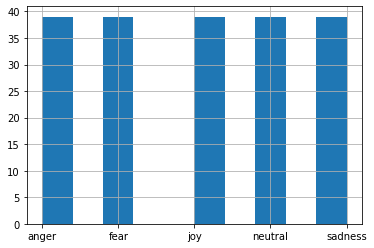

In [0]:
# verificação da identificação do rótulo na base de treinamento
rotulo = base_treino.iloc[0:base_treino.shape[0],1]
rotulo.hist()

# ORGANIZAÇÃO DA BASE 
## Nessa etapa o objetivo é tornar os pares das coordenadas campos do Data Frame a ser gerado para treino e validação

In [0]:
dados = np.zeros(shape=(entrada.shape[0],2*entrada.shape[1]))
for j in range(entrada.shape[1]):
  for i in range(entrada.shape[0]):
    par = entrada.iloc[i,j].split(';')
    dados[i,2*j] = float(par[0].split('(')[1])
    dados[i,2*j+1] = float(par[1].split(')')[0])
input = pd.DataFrame(data=dados)
input.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111
0,302.0,328.0,370.5,331.5,340.0,315.5,337.5,368.0,330.0,312.0,350.0,312.5,314.5,317.5,362.5,319.0,308.0,357.0,362.0,359.0,323.0,211.5,297.0,205.0,272.5,209.5,371.0,213.0,393.5,208.5,420.0,218.5,320.5,238.0,280.0,232.5,300.0,224.0,299.5,242.0,...,400.0,151.0,337.5,408.5,263.5,337.5,409.0,339.5,288.0,382.5,382.0,385.0,228.0,214.0,219.0,242.5,243.5,290.0,254.0,286.5,453.5,227.0,459.0,254.5,428.5,302.5,422.0,296.0,318.0,323.5,316.5,356.0,338.5,322.5,337.5,358.0,359.5,323.0,357.5,351.0
1,333.5,340.5,386.5,337.0,365.0,312.0,361.0,372.5,354.5,312.0,377.0,310.5,341.0,323.5,385.0,322.5,339.5,360.5,380.0,358.5,334.0,215.5,311.0,210.5,281.0,219.5,380.0,216.0,404.5,206.5,429.5,213.5,335.5,243.5,292.0,243.0,310.5,234.0,311.5,250.0,...,402.5,154.0,361.0,403.5,285.5,352.5,421.0,330.5,311.5,386.0,404.5,372.5,224.0,224.5,217.5,252.5,248.0,299.5,259.5,292.5,451.5,215.5,457.5,238.0,436.5,292.5,429.0,290.0,345.5,328.5,345.0,350.0,362.5,322.0,361.5,356.5,375.0,323.0,376.0,343.0
2,297.5,308.0,373.0,311.5,339.0,295.0,336.5,340.5,327.5,292.0,349.0,293.0,310.5,297.0,363.5,300.0,309.5,333.5,361.5,332.5,316.0,195.5,293.5,191.5,269.0,201.0,369.5,199.0,396.0,196.0,419.0,209.5,319.5,226.5,280.0,226.5,299.5,224.0,299.5,231.5,...,400.5,145.5,333.5,387.0,260.0,321.5,410.5,329.0,279.5,358.0,379.5,364.0,227.0,211.0,219.5,241.5,242.5,286.0,254.0,279.5,453.0,224.5,460.0,253.0,429.0,299.0,420.5,289.5,319.0,300.0,316.0,327.5,337.0,300.5,336.5,332.0,357.0,303.0,357.5,328.5
3,309.0,322.0,383.5,325.0,355.5,307.0,352.0,355.0,345.0,303.0,365.5,304.0,326.0,309.5,378.0,313.0,324.5,351.0,374.0,350.5,328.5,202.5,305.0,197.5,278.5,204.5,381.0,205.0,402.5,200.5,427.0,211.5,329.5,234.0,289.5,230.5,306.5,221.5,305.5,237.5,...,402.5,147.5,353.0,396.5,269.5,340.5,412.0,334.0,300.0,378.5,392.0,372.0,217.5,216.5,211.5,248.5,242.0,292.5,251.5,286.5,445.5,222.0,451.5,250.0,429.0,298.5,422.5,295.0,334.0,316.0,331.0,344.5,353.5,315.5,351.5,346.0,371.5,318.0,370.5,339.5
4,317.0,331.5,381.0,333.0,352.5,319.0,350.0,358.5,341.5,316.0,362.0,316.0,329.0,321.5,371.0,322.0,329.0,349.5,370.5,350.0,329.0,210.5,307.0,206.0,282.0,210.5,379.5,209.5,404.0,207.5,427.0,218.0,330.0,239.0,287.0,233.5,309.0,226.0,307.0,243.0,...,407.0,156.0,352.5,400.0,272.0,342.5,412.0,345.0,297.0,377.5,390.5,380.5,230.5,217.5,222.0,245.5,247.5,292.5,259.5,287.0,455.5,226.0,461.0,251.0,434.5,300.0,427.0,295.0,332.0,328.0,331.0,342.5,350.5,327.0,350.5,346.0,369.5,329.0,369.5,338.5
5,309.0,317.0,371.0,319.5,342.0,309.0,341.0,330.5,335.5,306.0,349.5,306.5,323.0,310.0,361.0,312.0,323.0,328.0,356.5,328.0,322.0,203.5,301.0,198.5,277.5,200.5,373.0,205.5,394.5,202.5,419.0,210.5,323.0,230.0,279.5,226.5,302.0,218.5,300.5,234.5,...,393.5,147.5,341.5,375.0,266.5,326.0,413.0,328.5,294.0,358.5,387.5,361.0,230.5,214.5,222.5,243.5,246.0,288.0,256.0,280.5,456.0,226.0,460.5,253.0,432.5,300.5,423.5,295.0,323.5,316.0,323.5,318.0,341.5,314.5,341.5,319.5,356.0,316.0,356.0,317.5
6,305.0,324.5,367.0,327.5,338.5,307.0,337.0,354.5,326.5,306.0,351.5,307.0,313.0,313.0,362.5,314.5,311.5,344.0,357.5,347.5,315.0,212.5,293.0,206.5,270.0,210.5,366.5,212.5,391.0,208.5,416.5,217.0,317.5,238.0,276.5,232.5,296.5,225.5,296.0,242.5,...,392.0,149.5,339.5,392.0,261.5,330.5,408.5,335.0,288.0,368.0,384.5,368.0,225.0,215.5,216.5,245.5,241.5,291.0,252.5,285.5,450.5,225.5,459.0,251.5,429.0,302.0,420.0,294.5,318.5,320.5,318.0,334.5,339.0,314.5,337.5,341.0,356.0,319.5,356.0,336.5
7,307.5,314.5,370.0,318.5,345.0,300.0,340.0,341.0,336.5,297.0,355.0,297.5,322.5,303.5,365.0,307.5,319.5,332.5,356.0,332.0,325.5,203.5,302.0,197.0,276.5,198.5,376.0,203.0,397.5,201.0,421.5,210.5,323.0,229.5,282.5,225.5,302.5,216.5,301.5,234.0,...,404.0,148.5,341.5,381.0,266.5,327.0,410.0,330.0,293.0,360.5,382.5,360.5,228.0,211.0,220.0,241.5,244.5,286

# Identificação dos rótulos no Data Frame gerado para treino e validação. 
# O uso da técnica *One-hot Encode* que é uma representação de variáveis categóricas como vetores binários, assim cada valor inteiro é representado como um vetor binário com todos os valores zero, exceto o índice do número inteiro, marcado com 1. Com a conversão das variáveis categóricas, é possível fornecer ao algoritmo de Machine Learning para que seja feito um trabalho melhor na previsão.

In [0]:

emotion = np.zeros(shape=(rotulo.shape[0],5))
for i in range(rotulo.shape[0]):
    if rotulo.iloc[i] == 'fear':
      emotion[i][0] = 1
    elif rotulo.iloc[i] == 'anger':
      emotion[i][1] = 1
    elif rotulo.iloc[i] == 'joy':
      emotion[i][2] = 1
    elif rotulo.iloc[i] == 'sadness':
      emotion[i][3] = 1
    elif rotulo.iloc[i] == 'neutral':
      emotion[i][4] = 1
classe_emotion = pd.DataFrame(data=emotion)
classe_emotion.head(20)

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0


## Nessa etapa, é feita a seleção do nome dos arquivos correspondentes aos dados de entrada para posterior exibição

In [0]:
arquivo_imagens=base_treino.iloc[0:base_treino.shape[0],0]
arquivo_imagens.head()
#carrega_imagem=np.zeros(shape=(arquivo_imagens.shape))
carrega_imagem=["" for x in range((arquivo_imagens.shape[0]))]
for i in range (arquivo_imagens.shape[0]) :
    carrega_imagem[i]=arquivo_imagens.iloc[i]
carrega_imagem

['Em22_Fala1_0049_640x480.png',
 'Em22_Fala3_0041_640x480.png',
 'Em22_Fala1_0165_640x480.png',
 'Em22_Fala2_0166_640x480.png',
 'Em22_Fala3_0292_640x480.png',
 'Em22_Fala3_0346_640x480.png',
 'Em22_Fala1_0085_640x480.png',
 'Em22_Fala1_0040_640x480.png',
 'Em22_Fala1_0033_640x480.png',
 'Em22_Fala2_0188_640x480.png',
 'Em22_Fala2_0197_640x480.png',
 'Em22_Fala2_0174_640x480.png',
 'Em22_Fala3_0003_640x480.png',
 'Em22_Fala1_0106_640x480.png',
 'Em22_Fala3_0277_640x480.png',
 'Em22_Fala1_0073_640x480.png',
 'Em22_Fala3_0193_640x480.png',
 'Em22_Fala3_0095_640x480.png',
 'Em22_Fala3_0246_640x480.png',
 'Em22_Fala3_0180_640x480.png',
 'Em22_Fala3_0024_640x480.png',
 'Em22_Fala1_0092_640x480.png',
 'Em22_Fala3_0288_640x480.png',
 'Em22_Fala1_0132_640x480.png',
 'Em22_Fala3_0261_640x480.png',
 'Em22_Fala2_0099_640x480.png',
 'Em22_Fala3_0091_640x480.png',
 'Em22_Fala2_0095_640x480.png',
 'Em22_Fala2_0268_640x480.png',
 'Em22_Fala1_0212_640x480.png',
 'Em22_Fala3_0316_640x480.png',
 'Em22_F

## NORMALIZAÇÃO DO DATASET
# Identificar a máxima amplitude existente nos dados por meio do cálculo do valor máximo e do valor mínimo das entradas.
# Nessa etapa, a relação de distância entre os pontos de entrada se mantém e, isso é fundamental para manter a relação entre os dados.

In [0]:
# Identifica o Máximo Global que é o maior valor das linhas e colunas do Dataframe
maximo = input.max().max()

# Identifica o Mínimo Global que é o o menor valor das linhas e colunas do Dataframe
minimo = input.min().min()

# Calcula o Denominador a partir da amplitude máxima
denom = maximo - minimo

# Normaliza a entrada
input = (input-minimo)/denom

input.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111
0,0.517857,0.589286,0.706044,0.598901,0.622253,0.554945,0.615385,0.699176,0.594780,0.545330,0.649725,0.546703,0.552198,0.560440,0.684066,0.564560,0.534341,0.668956,0.682692,0.674451,0.575549,0.269231,0.504121,0.251374,0.436813,0.263736,0.707418,0.273352,0.769231,0.260989,0.842033,0.288462,0.568681,0.342033,0.457418,0.326923,0.512363,0.303571,0.510989,0.353022,...,0.787088,0.103022,0.615385,0.810440,0.412088,0.615385,0.811813,0.620879,0.479396,0.739011,0.737637,0.745879,0.314560,0.276099,0.289835,0.354396,0.357143,0.484890,0.385989,0.475275,0.934066,0.311813,0.949176,0.387363,0.865385,0.519231,0.847527,0.501374,0.561813,0.576923,0.557692,0.666209,0.618132,0.574176,0.615385,0.671703,0.675824,0.575549,0.670330,0.652473
1,0.604396,0.623626,0.750000,0.614011,0.690934,0.545330,0.679945,0.711538,0.662088,0.545330,0.723901,0.541209,0.625000,0.576923,0.745879,0.574176,0.620879,0.678571,0.732143,0.673077,0.605769,0.280220,0.542582,0.266484,0.460165,0.291209,0.732143,0.281593,0.799451,0.255495,0.868132,0.274725,0.609890,0.357143,0.490385,0.355769,0.541209,0.331044,0.543956,0.375000,...,0.793956,0.111264,0.679945,0.796703,0.472527,0.656593,0.844780,0.596154,0.543956,0.748626,0.799451,0.711538,0.303571,0.304945,0.285714,0.381868,0.369505,0.510989,0.401099,0.491758,0.928571,0.280220,0.945055,0.342033,0.887363,0.491758,0.866758,0.484890,0.637363,0.590659,0.635989,0.649725,0.684066,0.572802,0.681319,0.667582,0.718407,0.575549,0.721154,0.630495
2,0.505495,0.534341,0.712912,0.543956,0.619505,0.498626,0.612637,0.623626,0.587912,0.490385,0.646978,0.493132,0.541209,0.504121,0.686813,0.512363,0.538462,0.604396,0.681319,0.601648,0.556319,0.225275,0.494505,0.214286,0.427198,0.240385,0.703297,0.234890,0.776099,0.226648,0.839286,0.263736,0.565934,0.310440,0.457418,0.310440,0.510989,0.303571,0.510989,0.324176,...,0.788462,0.087912,0.604396,0.751374,0.402473,0.571429,0.815934,0.592033,0.456044,0.671703,0.730769,0.688187,0.311813,0.267857,0.291209,0.351648,0.354396,0.473901,0.385989,0.456044,0.932692,0.304945,0.951923,0.383242,0.866758,0.509615,0.843407,0.483516,0.564560,0.512363,0.556319,0.587912,0.614011,0.513736,0.612637,0.600275,0.668956,0.520604,0.670330,0.590659
3,0.537088,0.572802,0.741758,0.581044,0.664835,0.531593,0.655220,0.663462,0.635989,0.520604,0.692308,0.523352,0.583791,0.538462,0.726648,0.548077,0.579670,0.652473,0.715659,0.651099,0.590659,0.244505,0.526099,0.230769,0.453297,0.250000,0.734890,0.251374,0.793956,0.239011,0.861264,0.269231,0.593407,0.331044,0.483516,0.321429,0.530220,0.296703,0.527473,0.340659,...,0.793956,0.093407,0.657967,0.777473,0.428571,0.623626,0.820055,0.605769,0.512363,0.728022,0.765110,0.710165,0.285714,0.282967,0.269231,0.370879,0.353022,0.491758,0.379121,0.475275,0.912088,0.298077,0.928571,0.375000,0.866758,0.508242,0.848901,0.498626,0.605769,0.556319,0.597527,0.634615,0.659341,0.554945,0.653846,0.638736,0.708791,0.561813,0.706044,0.620879
4,0.559066,0.598901,0.734890,0.603022,0.656593,0.564560,0.649725,0.673077,0.626374,0.556319,0.682692,0.556319,0.592033,0.571429,0.707418,0.572802,0.592033,0.648352,0.706044,0.649725,0.592033,0.266484,0.531593,0.254121,0.462912,0.266484,0.730769,0.263736,0.798077,0.258242,0.861264,0.287088,0.594780,0.344780,0.476648,0.329670,0.537088,0.309066,0.531593,0.355769,...,0.806319,0.116758,0.656593,0.787088,0.435440,0.629121,0.820055,0.635989,0.504121,0.725275,0.760989,0.733516,0.321429,0.285714,0.298077,0.362637,0.368132,0.491758,0.401099,0.476648,0.939560,0.309066,0.954670,0.377747,0.881868,0.512363,0.861264,0.498626,0.600275,0.589286,0.597527,0.629121,0.651099,0.586538,0.651099,0.638736,0.703297,0.592033,0.703297,0.618132


# Aplicação do Modelo de Classificador na Base de Treinamento
## Escolhi a técnica MLP (Multilayer Perceptron) que é uma Rede Neural Artificial de avanço que gera um conjunto de saídas a partir de um conjunto de entradas. Uma MLP é caracterizado por várias camadas (layers) de nós de entrada totalmente conectados (Fully Connected) com a camada escondida (hiden layer) e cujos neurônios são ativados a partir de uma Função de Ativação (FA) cujos pesos definem quanto aquele neurônio será propagado. A MLP usa a retropropagação para treinar a rede. 
As MLPs são adequadas para problemas de previsão de classificação nas quais as entradas recebem uma classe ou rótulo. É um algoritmo flexível que permite sua aplicação em vários tipos de dados. Por exemplo, os pixels de uma imagem podem ser reduzidos para uma longa linha de dados e alimentados em um MLP.
Portanto, o problema foi modelado com uma Rede Neural de 3 camadas, uso de função de Ativação (FA) em 2 dessas camdadas e a função SoftMax na última camada para identificação da probabilidade de pertencer a cada uma das classes.
Ao rodar o Classificador pela primeira vez, foi apurado uma taxa de erro de 16,80% e acurácia de 7,69%. Esses valores não são satisfatórios, por isso identifiquei a necessidade de normalizar a Base de Dados para facilitar o processo de treinamento e os pesos convergirem. Os pesos são inicializados em torno de zero de forma randômica e com variância, mas quando os dados estão muito distantes, como no caso dessa Base de Dados, fica mais difícil convergir, então a normalização se faz essencial. Ação essa que foi realizada na célula acima. Em seguida, rodei o classificador com diferentes cenários especificados abaixo e seus respectivos resultados.

In [0]:
# Separação da base de dados para gerar a base que servirá de treinamento e a base que servirá para a etapa de testes
#
X_treina, X_testa, Y_treina, Y_testa = sk.train_test_split(input, emotion, test_size=0.2, random_state=9)

In [0]:
model = Sequential()
model.add(Dense(80, activation='relu', input_dim=112))
# model.add(Dropout(0.5))
model.add(Dense(80, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

adam = Adam(lr=0.001)
# sgd = SGD(lr=0.01, decay=1e-6)
model.compile(loss='mean_squared_error',
              optimizer=adam,
              metrics=['accuracy'])

model.fit(X_treina, Y_treina,
          epochs=1000)
# A função ModelEvaluate aplica os dados de teste no modelo para avaliar o desempenho deste
score = model.evaluate(X_testa, Y_testa)









Epoch 1/2000





156/156 [==============================] - 1s 5ms/step - loss: 0.1612 - acc: 0.2179
Epoch 2/2000
156/156 [==============================] - 0s 118us/step - loss: 0.1611 - acc: 0.1795
Epoch 3/2000
156/156 [==============================] - 0s 95us/step - loss: 0.1605 - acc: 0.2115
Epoch 4/2000
156/156 [==============================] - 0s 107us/step - loss: 0.1592 - acc: 0.2308
Epoch 5/2000
156/156 [==============================] - 0s 80us/step - loss: 0.1597 - acc: 0.1923
Epoch 6/2000
156/156 [==============================] - 0s 91us/step - loss: 0.1597 - acc: 0.2115
Epoch 7/2000
156/156 [==============================] - 0s 102us/step - loss: 0.1592 - acc: 0.2372
Epoch 8/2000
156/156 [==============================] - 0s 128us/step - loss: 0.1589 - acc: 0.2308
Epoch 9/2000
156/156 [==============================] - 0s 122us/step - loss: 0.1590 - acc: 0.2308
Epoch 10/2000
156/156 [==============================] - 0s 100us/step - loss: 0.1588 - acc: 0.2308
Ep

## Cenário 1: Dados **não normalizados**, 80 neurônios em 2 camadas, Função SoftMax na última camada, FA=Tangente Hiperbólica e 1.000 Épocas 
Análise do Resultado: Taxa de Erro (16,28%) não satisfatória, assim como a acurácia (7,69%) muito baixa. Aqui se identificou a necessidade de melhorar a entrada do modelo, por isso se aplicou a normalização na célula acima.

In [0]:
# Score para o cenário de dados não normalizados
score

[0.03216095311710468, 0.8974358974358975]

## Cenário 2: Aplicação do Processo de Normalização e mesmos parâmetros do Cenário 1 com o objetivo de verificar a necessidade de organizar as entradas da base de dados.

Análise dos Resultados: o fato de ter aplicado uma normalização (sem alterar os outros parâmetros) demonstrou a eficácia deste processo, pois a Taxa de Erro passou para 13,51% e a Acurácia foi de 41,02%. Mas ainda é necessário continuar a etapa de identificação dos parâmetros para aferir melhores resultados.

In [0]:
# Score para o cenário de dados normalizados e 80 neurônios com FA Tanh
score

[0.03216095311710468, 0.8974358974358975]

## Cenário 3: Dados normalizados, 80 neurônios nas 2 camadas, Função SoftMax na última camada, FA=ReLu e 2.000 Épocas para identificar se a base de treinamento necessita mais execuções para aumentar a acurácia da etapa de treinamento.
Análise do Resultado: Apesar da Taxa de Erro ter diminuído (3,34%) e a Acurácia ter aumentado (87,17%) em relação ao Cenário 2, é importante continuar testando o modelo no atributo Função de Ativação e número de Épocas para verificar se é possível melhorar.

In [0]:
# Cenário de 80 neuronios nas 2 camadas, FA Relu, Epoch=2000
score

[0.03216095311710468, 0.8974358974358975]

## Cenário 4: Dados normalizados, 80 neurônios nas 2 camadas, Função SoftMax na última camada, FA=Tangente Hiperbólica e 1.000 Épocas, pois o resultado do Cenário 2 demonstrou que o aumento de Épocas não resultou numa melhora significativa da acurácia da etapa de treinamento.
Análise do Resultado: A Taxa de Erro aumentou (3,82%) e a Acurácia (87,17%) se manteve igual ao Cenário 3, portanto aumentar o número de Épocas não levou a uma melhor acurácia.

In [0]:
# Cenário de 80 neuronios nas 2 camadas, FA Tanh, Epoch=1000
score 

[0.03216095311710468, 0.8974358974358975]

## Cenário 5: Dados normalizados, 80 neurônios nas 2 camadas, Função SoftMax na última camada, FA=ReLu e 1.000 Épocas, para identificar o efeito que a mudança para a função ReLu implica nos resultados. 
A função ReLu não satura no ponto superior a saída dos neurônios a partir de um conjunto de pesos, enquanto que a Função Tangente Hiperbólica satura em 1 a saída. Portanto, o ajuste de pesos da Fução ReLu é mais suave, o que ajuda na convergência. A sauturação se constitui um problema, pois significa que a mudança do valor dos pesos não mudará o valor da saída do neurônio, o que trava o desenvolvimento deste.  

Análise do Resultado: Comparado ao cenário 4, temos uma pequena diminuiçao da Taxa de Erro (de 3,82% para 3,76%) e um aumento importante na Acurácia (de 87,17% para 92,30%), portanto esse indica ser os parâmetros que levam à melhor eficiência deste modelo.

In [0]:
#Score para cenário dados normalizados, 80 neurônios, FA Relu, Epoch =1000
score 

[0.03216095311710468, 0.8974358974358975]

## Cenário 6: Dados normalizados, **100 neurônios nas 2 camadas**, Função SoftMax na última camada, FA=ReLu e 1.000 Épocas com o objetivo de identificar se o aumento de neurônios levará à melhora do modelo.
Os neurônios recebem da Função de Ativação os pesos de cada conexão dos dados de entrada e o objetivo é gerar um mapeamento final entre a entrada (x) e a saída (y). Considerei a hipótese que a quantidade de neurônios anterior (80) poderiam não estar sendo suficientes para reproduzir os hiperplanos que dividem as classes.

Análise do Resultado: A Taxa de Erro aumentou (5,51%) e a Acurácia (79,48%) diminuiu em relação ao Cenário 5, portanto, concluo que o aumento dos neurônios não melhora a eficácia do modelo.

In [0]:
# Cenário de 100 neurônios na 1a. e 2a. camadas, FA Relu, Epoch=1000
score

[0.03216095311710468, 0.8974358974358975]

## Cenário 7: Dados normalizados, **80 neurônios na 1a. camada e 40 neurônios na 2a. camada**, Função SoftMax na última camada, FA=ReLu e 1.000 Épocas com o objetivo de identificar se diferentes quantidades de neurônios em cada camada levaria à melhora do modelo.
Os 80 neurônios da camada 1 estão mapeando o espaço R80 dos dados de entrada e, ao reduzir na metade a quantidade de neurônios da 2a. camada, significa que estou reduzindo a dimensão nessa etapa, portanto perdendo algumas informações das características dos dados nessa camada. Essa abordagem reduz o custo computacional.

Análise do Resultado: A Taxa de Erro diminuiu (4,77%) e a Acurácia (87,17%) aumentou em relação ao Cenário 6 (Taxa de Erro = 5,51% e Acurácia = 79,48%), portanto, concluo que esses parâmetros melhoraram o modelo se comparado com o cenário anterior, no entanto não representam uma melhor condição se comparado ao cenário 5 que apresentou Taxa de Erro = 3,76% e Acurácia de 92,30%. Donde se conclui que a não equalização do número de neurônios das 2 camadas melhora o modelo se comparado com a abordagem de aumento da quantidade de neurônios de forma igualitária nas camadas. 

In [0]:
# Cenário de 80 neurônios na 1a. camada e 40 neurônios na 2a. camada, FA RELU, EPoch=1000
score 

[0.03216095311710468, 0.8974358974358975]

## Cenário 8: Identificação se um menor número de neurônios melhora o modelo. Dados Normalizados, **40 neurônios nas 2 camadas**, Função SoftMax na última camada, FA=ReLu e 1.000 Épocas.
Cada neurônios extrai as características de cada entrada e serve para reproduzir o reflexo dessas características no mapeamento final(saída). Ao rodar esse cenário, verificou-se que 40 neurônios em cada camada não foram suficientes para repdroduzir os hiperplanos de cada classe.
Análise do Resultado: uma menor quantidade de neurônios não melhorou a etapa de treinamento do modelo, já que aumentou a Taxa de Erro (7,10%) e diminuiu a Acurácia (76,92%) se comparado com os cenário de 3 a 6.

In [0]:
#Cenário dados normalizados, 40 neurônios, Relu, Epoch=1000
score 

[0.03216095311710468, 0.8974358974358975]

## Escolha dos parâmetros para etapa de Teste
Após implementar 7 cenários onde diferentes parâmetros foram analisados considerando suas implicações no resultado do modelo de treinamento, concluo que o Cenário 5 apresentou os melhores resultados de Taxa de Erro (3,76%) e Acurácia (92,30%). Portanto, seguimos para a próxima etapa que será a aplicação do algoritmo na base de teste.

## CLASSIFICAÇÃO DA BASE DE TREINAMENTO


In [0]:
model.save('classifica_emocao.h5')

In [0]:
base_treino.loc[base_treino[:][0]=='Em22_Fala3_0180_640x480.png'].index[0]

58

# VALIDAÇÃO 
## Verificação se o rótulo da base de teste corresponde ao rótulo da base de treinamento, o que indica a eficiência do algoritmo.
As imagens abaixo informam o rótulo da inferência e o rótulo da base original que já havia sido identificada.

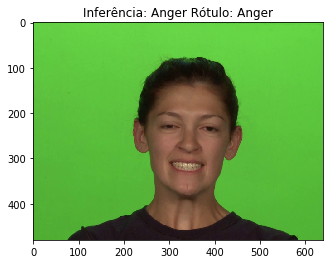

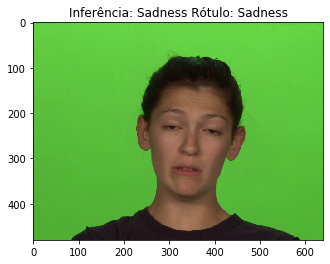

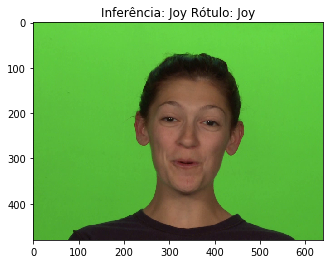

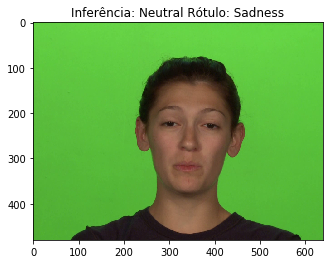

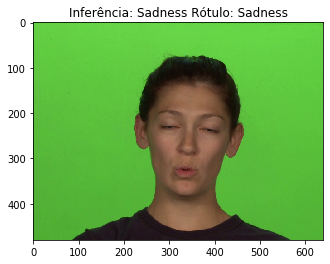

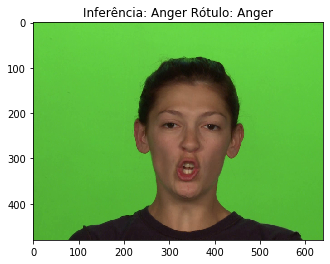

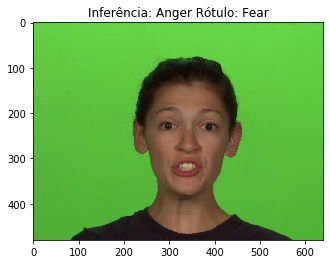

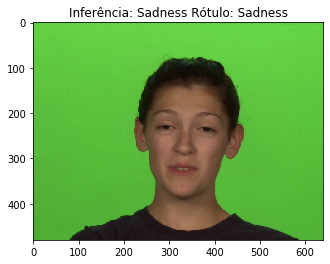

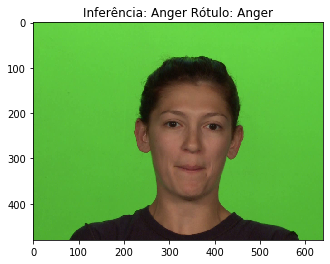

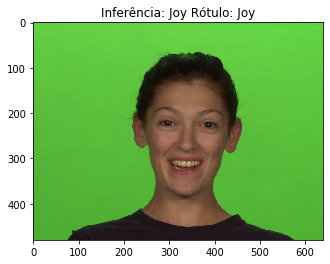

In [0]:
# fear anger joy sadness neutral
# Inferência a partir da rede treinada usando a base de teste

indice=base_treino.loc[base_treino[:][0]=='Em6_Fala1_Neutra_0512_640x480.png'].index[0]
amostras = X_testa.sample(n=10)
prob=model.predict(amostras)
for i in range(10) :
  emocao=prob[i].argmax()
  emocao_real = classe_emotion.iloc[classe_emotion.index == amostras.index[i]].idxmax(axis=1)
  if emocao==0 :
    inferencia='Inferência: Fear'
  elif emocao==1 :
    inferencia='Inferência: Anger'
  elif emocao==2 :
    inferencia='Inferência: Joy'
  elif emocao==3 :
    inferencia='Inferência: Sadness'
  elif emocao==4 :
    inferencia='Inferência: Neutral'
  if emocao_real.iloc[0]==0 :
    rotulado='Rótulo: Fear'
  elif emocao_real.iloc[0]==1 :
    rotulado='Rótulo: Anger'
  elif emocao_real.iloc[0]==2 :
    rotulado='Rótulo: Joy'
  elif emocao_real.iloc[0]==3 :
    rotulado='Rótulo: Sadness'
  elif emocao_real.iloc[0]==4 :
    rotulado='Rótulo: Neutral'
  
  # Carrega a imagem que é correspondente à entrada de Teste
  nome_imagem = carrega_imagem[amostras.index[i]]
  imagem=mpimg.imread(nome_imagem)
  plt.figure()
  plt.imshow(imagem)
  plt.title(inferencia+" "+rotulado)

23    1
dtype: int64

'Em22_Fala1_0049_640x480.png'

In [0]:
print(imagem_face.iloc[imagem_face.index == amostras.index[0]][1])

In [0]:
base_treino.index == 84

In [0]:
# Dataset de Teste
X_testa.sample(n=10)